In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [ ]:
import matplotlib.pyplot as plt

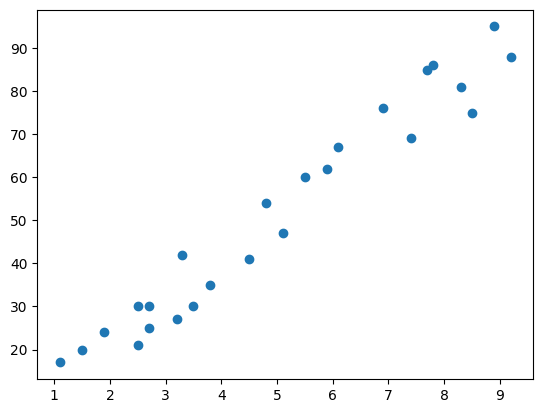

In [ ]:
plt.scatter(x=df['Hours'], y=df['Scores'])

In [ ]:
X = df.iloc[:, :1]
y = df.iloc[:, -1]

In [ ]:
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [ ]:
y

,Scores
0,21
1,47
2,27
3,75
4,30
5,20
6,88
7,60
8,81
9,25


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape

(20, 1)

In [ ]:
y_test.shape

(5,)

In [ ]:
y_test

,Scores
5,20
2,27
19,69
16,30
11,62


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_test

,Scores
5,20
2,27
19,69
16,30
11,62


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_test, y_pred)

4.183859899002982

In [ ]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
# y = mx + c
# 1.5 * 9.91065648 + 2.018160041434662
# 16.8841447614

In [ ]:
model.coef_

array([9.91065648])

In [ ]:
model.intercept_

2.018160041434662

In [ ]:
X_test

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


#### C = Y_bar - M*X_bar

#### M = sum{(Y_i - Y_bar)*(X_i - X_bar)}/ sum{(X_i - X_bar)^2}

In [ ]:
class GUBRegression:
  def __init__(self):
    self.m = None
    self.c = None

  def fit(self, X_train, y_train):
    num = 0
    den = 0
    for i in range(len(X_train)):
      num = num +  (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
      den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())
    self.m = num/den
    self.c = y_train.mean() - self.m*X_train.mean()

  def predict(self, X_test):
    y_pred = np.array([])
    for i in range(len(X_test)):
      y_pred = np.append(y_pred, self.m*X_test[i] + self.c)
    return y_pred

In [ ]:
X = df.iloc[:, :1].values
y = df.iloc[:, -1].values

In [ ]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model1 = GUBRegression()

In [ ]:
model1.fit(X_train, y_train)

In [ ]:
model1.predict(X_test)

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])